In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../utils')
import handle_db as hdb
import config as config

In [2]:
the_symbol = 'BTC'

In [3]:
print(config.COLUMN_NAMES)

['time_re', 'price_usd', 'volume_usd', 'price_btc', 'volume_btc', 'time_lu']


In [4]:
the_file = f'/home/pablo/MEGA/SEGURO_DE_DATOS/datos/old_database/{the_symbol}_todo.dat'

In [5]:
df = pd.read_csv(the_file, dtype = {'time_re':np.float64, 'price_usd':np.float64, 'price_btc':np.float64, 'volume_usd':np.float64, 'volume_btc':np.float64}, 
                 names = ['time_re', 'price_usd', 'price_btc', 'volume_usd', 'volume_btc'], 
                 usecols=[0, 1, 2, 3, 4], 
                 delim_whitespace = True)
df.tail(10)

,time_re,price_usd,price_btc,volume_usd,volume_btc
105899,439198.760661,9784.38,1.0,7.045971e+10,7.201244e+06
105900,439198.852227,9787.00,1.0,7.046473e+10,7.199829e+06
105901,439198.940552,9779.68,1.0,7.048267e+10,7.207053e+06
105902,439199.029713,9780.16,1.0,7.047165e+10,7.205573e+06
105903,439199.120672,9792.79,1.0,7.013517e+10,7.161919e+06
105904,439199.209795,9775.92,1.0,6.992344e+10,7.152620e+06
105905,439199.299288,9776.51,1.0,6.993732e+10,7.153608e+06
105906,439199.389023,9799.95,1.0,6.982531e+10,7.125068e+06
105907,439199.477886,9800.11,1.0,6.982793e+10,7.125219e+06
105908,439199.567165,9781.05,1.0,6.969681e+10,7.125698e+06


In [6]:
df['time_re'] = df['time_re'].apply(lambda x : int(round(x*3600,0)))
df['time_lu'] = df['time_re']
df.head()

,time_re,price_usd,price_btc,volume_usd,volume_btc,time_lu
0,1524903743,9107.61,1.0,7.442910e+09,817218.787366,1524903743
1,1524903872,9107.61,1.0,7.442910e+09,817218.787366,1524903872
2,1524903940,9109.33,1.0,7.434300e+09,816119.297468,1524903940
3,1524904064,9109.33,1.0,7.434300e+09,816119.297468,1524904064
4,1524904185,9109.33,1.0,7.434300e+09,816119.297468,1524904185


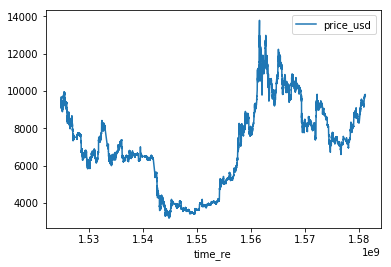

In [7]:
df.plot('time_re', 'price_usd')

In [8]:
cnx = hdb.start_mysql_connection(config.DATABASES['old_data'])
cursor = cnx.cursor(buffered=True)

In [9]:
hdb.create_table(cursor, cnx, the_symbol)


False

In [ ]:
for index, row in df.iterrows():
    hdb.write_a_line(cursor, cnx, the_symbol, row.to_dict())

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f

Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data for  BTC
Error: some problems adding data f